### Homework 2 - Part 2 - Task 2: GMM and PCA
Gaussian Mixture Model(GMM) and PCA <br>
We will use face image dataset to build GMM model to generate new face images <br>
GMM is very slow for high dimentional data <br>
To speed-up GMM, we will apply PCA to the input images. <br>
image samples => forward PCA => samples in a lower-dimensional space => GMM <br>
GMM => random sampling => new samples in a lower-dimensional space => inverse PCA => new images <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn <br>
see GMM_DE_Generative_Model.ipynb

In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

Load image data

In [96]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=500)
print(faces.target_names)
print(faces.images.shape)

['George W Bush']
(530, 62, 47)


check the total number of samples/images, `N`

In [3]:
#what is N ?
N=faces.images.shape[0]
N

530

check the input dimension (the number of elements in each input sample), `M`

In [4]:
#what is M?
M=faces.images.shape[1]*faces.images.shape[2]
M

2914

Next let's plot the first 100 of these to recall exactly what we're looking at:

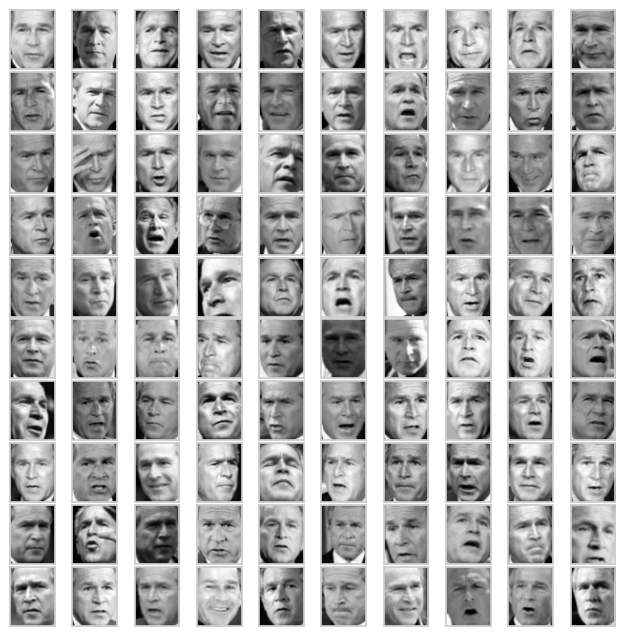

In [97]:
def plot_faces(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i], cmap='gray')
plot_faces(faces.images)

We have N images, and each image has M pixels <br>
N = 530  <  M = 2914 <br>
the number of samples is smaller than the dimension <br>
We will use dimension reduction to reduce the number of features

In [17]:
# the shape of the dataset
faces.data.shape

(530, 2914)

In [98]:
# apply PCA to images
# you may need this: images.reshape(N,-1)
# set PCA paramter n_components to 120
# set whiten=True to use the normalized features
# assume data = pca.fit_transform(...)
from sklearn.decomposition import PCA

pca=PCA(n_components=120, whiten=True)
data=pca.fit_transform(faces.data)

In [58]:
#check the shape of data
data.shape

(530, 120)

In [8]:
#check the value of cumulative explained variance ratio
#i.e., the percentage of the variance that is explained



0.953646

In [62]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

cumulative_variance_ratio[-1]

0.95365006

Afer PCA transform, the number of features is changed from 2914 (62*47) to 120 <br>
N = 530,  data.shape[1] = 120 <br>
Now, we fit many GMM to `data` with different number of components <br>
We will select the best one based on AIC

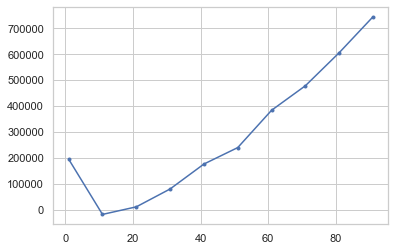

In [9]:
#fit GMM with n_components in the range of 1 to 100 with step 10
n_components = np.arange(1, 100, 10)


c:\Users\Mestr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


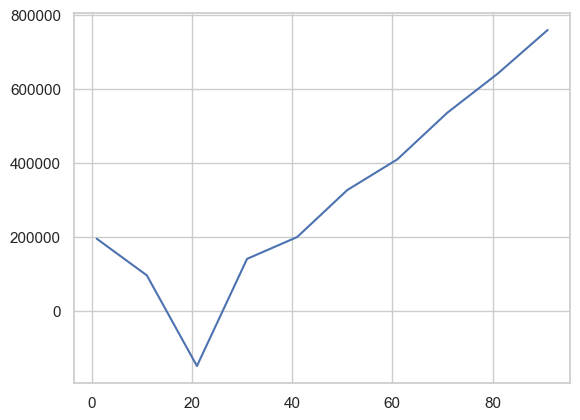

In [99]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 100, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

Overall, the curve keeps going up: something is weird. <br>
What will the curve be if we have more data to train GMM ? <br>
note: you may get a different curve due to some randomness in initialization.

It looks like when n_components=10, AIC reaches the minimum. <br>
Let's fit the GMM with n_components=10, and check if gmm is converged or not 

In [10]:
# you code to fit GMM
#
#---------
print(gmm.converged_)

True


In [100]:
# you code to fit GMM
#
#---------
from sklearn.mixture import GaussianMixture
gmm=GMM(n_components=21)
gmm.fit(data)
print(gmm.converged_)

True


Draw 100 new samples from GMM (gmm) <br>
The new data samples are in the 120-dimensional projected space

In [101]:
#your code to generate data_new from gmm
#
data_new, _ = gmm.sample(120)
#then check the shape
data_new.shape

(120, 120)

Finally, we can transform the 100 samples back to the original space (pca inverse) <br>
and plot some of the images in the original space <br>

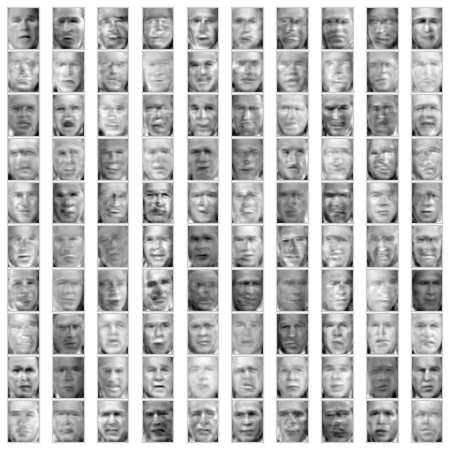

In [12]:
# your code to obtain faces_new by apply inverse pca on data_new
#
pca_= PCA(n_components=100, whiten=True)
faces_new = pca.inverse_transform(data_new)
# show the new images
plot_faces(faces_new.reshape(-1,62, 47))

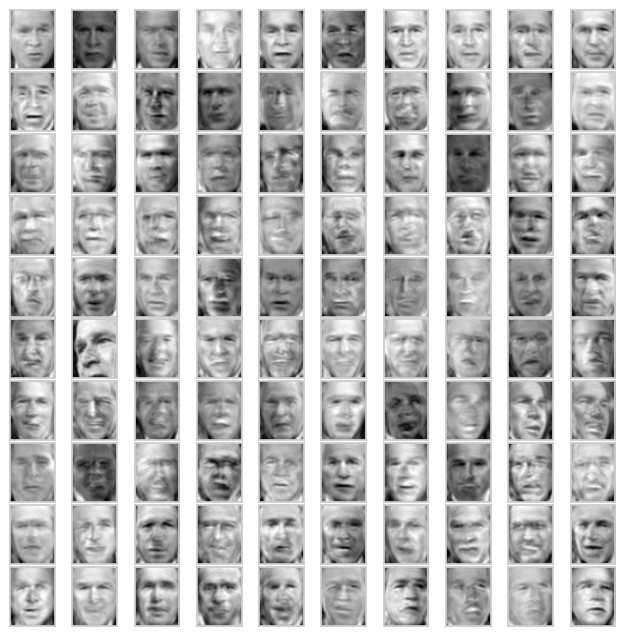

In [102]:
pca_= PCA(n_components=100, whiten=True)
faces_new = pca.inverse_transform(data_new)
# show the new images
plot_faces(faces_new.reshape(-1,62, 47))

### Let's repeat the above process using more data

In [76]:
#do not change the code in this cell
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


In [14]:
#check the number of images
# N = ?

1560

In [77]:
N_new=faces.images.shape[0]
N_new

1560

In [15]:
#check the input dimension (the number of elements in each input sample)
# M = ?

2914

In [78]:
M_new=faces.images.shape[1]*faces.images.shape[2]
M_new

2914

We have N images, and each iamge has M pixels  <br>
N = 1560 and M = 2914 : N < M  <br>
We will use dimension reduction to reduce the number of features from 2914 to 120 <br>

In [79]:
# apply PCA to images
# set PCA parameter n_components to 120
# assume data = pca.fit_transform(...)

pca=PCA(n_components=120, whiten=True)
data=pca.fit_transform(faces.data)


In [80]:
#check the shape of data
data.shape

(1560, 120)

In [18]:
#check the value of cumulative explained variance ratio


0.9289787

In [81]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

cumulative_variance_ratio[-1]

0.92900145

Now, we fit many GMMs to the transformed `data` with different number of components   <br>
We will select the best one based on AIC

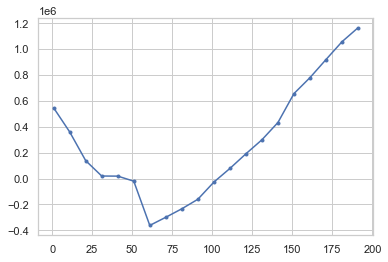

In [19]:
#fit GMM with n_components in the range of 1 to 200 with the step of 10


c:\Users\Mestr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


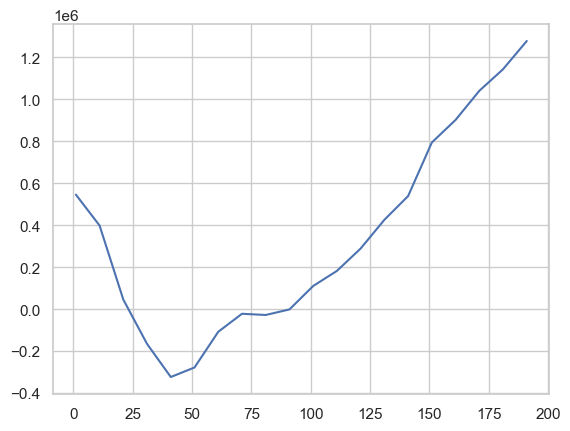

In [82]:
n_components = np.arange(1, 200, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

Now, we have a U-haped curve, nice. (again, you may get a different curve) <br>
It appears that AIC is miminized around 60 components. <br>
What is the exact value of n_components when AIC is minimum?

In [20]:
#find out the exact value of n_components when AIC is at its minimum
#you may get a different number due to randomness in GMM


61

In [83]:
best_idx = np.argmin(aics)
best_n_components = n_components[best_idx]
best_n_components

41

Let's quickly fit GMM with n_components=61 (or other number in your file) to the `data` and confirm that it has converged:

In [21]:
# fit the GMM with n_components = the value you choose


True


In [92]:
gmm=GMM(n_components=41)
gmm.fit(data)
print(gmm.converged_)

True


Generate 100 new samples from this GMM

In [93]:
#your code to generate data_new from gmm
#
data_new, _ = gmm.sample(100)
#then check the shape
data_new.shape

(100, 120)

Transform the 100 new samples back to the original space

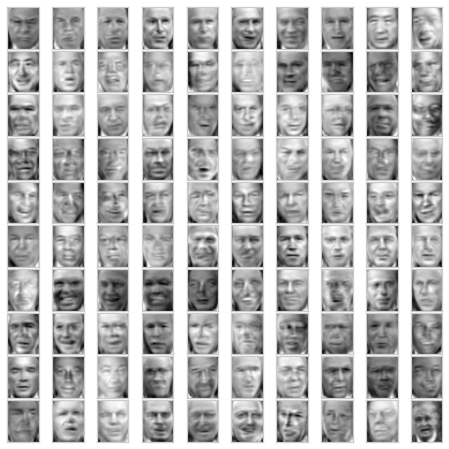

In [23]:
# your code to obtain faces_new by apply inverse pca on data_new
#
# show the new images
plot_faces(faces_new.reshape(-1,62, 47))

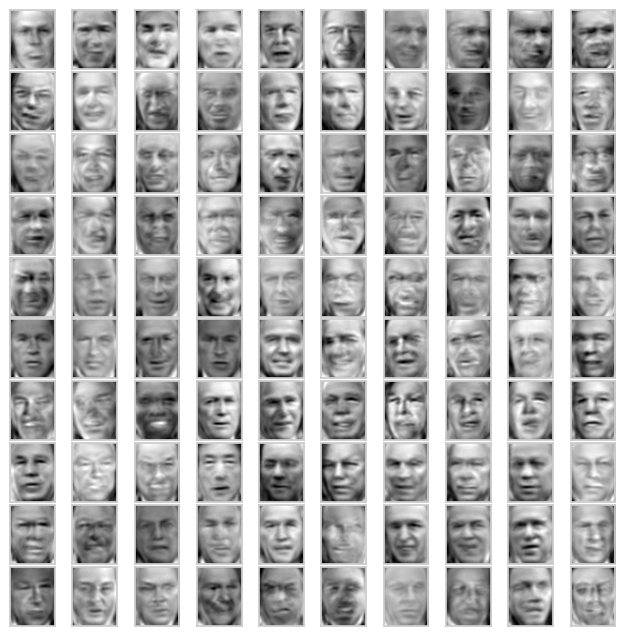

In [95]:
faces_new = pca.inverse_transform(data_new)
# show the new images
plot_faces(faces_new.reshape(-1,62, 47))

GMM is good but very time consuming. PCA+GMM is a good approach to reduce time cost.